# Psi4 Lab 03: Introduction


## Potential Energy Function

## Part1

Calculate potential energy curve of HF molecule. You will need to calculate the potential energy curve of HF molecule using HF, BLYP, MP2, CCSD(T) methods with 6-31G basis set.

### Example: H2 Molecule

In [1]:
import psi4

psi4.set_memory('1 GB')

1000000000

In [3]:
# calculate H atom

import psi4

hatom = psi4.geometry("""
0 2
H
""")

psi4.set_options({'reference': 'uhf'})
psi4.core.set_output_file('h.log', False)

hf_h_eng = psi4.energy('hf/6-31g', molecule=hatom)
blyp_h_eng = psi4.energy('blyp/6-31g', molecule=hatom)
mp2_h_eng = psi4.energy('mp2/6-31g', molecule=hatom)
ccsdt_h_eng = psi4.energy('ccsd(t)/6-31g', molecule=hatom)

print('hf = ',hf_h_eng)
print('blyp = ',blyp_h_eng)
print('mp2 = ',mp2_h_eng)
print('ccsd(t) = ',ccsdt_h_eng)


hf =  -0.4982329107290702
blyp =  -0.4954469190923684
mp2 =  -0.4982329107290702
ccsd(t) =  -0.4982329107290702


In [4]:
# Calculate H2 with various distances

# set geometry
h2 = psi4.geometry("""
0  1
H
H   1  R
""")

# scan bond distances
Rvals = [0.5,0.6,0.7,0.8,0.9,1.0,1.2,1.5,1.7,2.0,3.0,4.0,4.5,5.0,5.5,6.0,7.0]

# dictionary store the calculated values
hf_pef = {}
blyp_pef = {}
mp2_pef = {}
ccsdt_pef = {}

# perform calculation, store energy difference in kcal/mol
for R in Rvals:
    h2.R = R
    hf_pef[R] = (psi4.energy('hf/6-31G', molecule=h2) - 2*hf_h_eng)*psi4.constants.hartree2kcalmol
    blyp_pef[R] = (psi4.energy('blyp/6-31G', molecule=h2) - 2*blyp_h_eng)*psi4.constants.hartree2kcalmol
    mp2_pef[R] = (psi4.energy('mp2/6-31G', molecule=h2) - 2*mp2_h_eng)*psi4.constants.hartree2kcalmol
    ccsdt_pef[R] = (psi4.energy('ccsd(t)/6-31G', molecule=h2) - 2*ccsdt_h_eng)*psi4.constants.hartree2kcalmol
  
# Prints to screen
print("Distance in Angstrom, psi4.constants.hartree2kcalmolnergies in kcal/mol \n")
print("  R       E_HF    E_BLYP      E_MP2       E_CCSD(T)   )* psi4.constants.hartree2kcalmol     \n")
print("------------------------------------------------------------------\n")
for R in Rvals:
    hf_e = hf_pef[R] 
    blyp_e = blyp_pef[R] 
    mp2_e = mp2_pef[R] 
    ccsdt_e = ccsdt_pef[R] 
    print('{:4.1f} {:10.3f} {:10.3f} {:10.3f} {:10.3f} '.format(R, hf_e,blyp_e,mp2_e,ccsdt_e))

  
# Prints to output.dat
#psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
#psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
#psi4.core.print_out("---------------------------------------------------------\n")
#for R in Rvals:
#    e = ecp[R] * psi4.constants.hartree2kcalmol
#    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))


Distance in Angstrom, psi4.constants.hartree2kcalmolnergies in kcal/mol 

  R       E_HF    E_BLYP      E_MP2       E_CCSD(T)   )* psi4.constants.hartree2kcalmol     

------------------------------------------------------------------

 0.5    -38.630    -62.712    -47.799    -51.078 
 0.6    -71.264    -96.747    -81.188    -85.020 
 0.7    -81.362   -108.366    -91.985    -96.443 
 0.8    -79.850   -108.426    -91.156    -96.362 
 0.9    -72.303   -102.476    -84.320    -90.447 
 1.0    -61.712    -93.509    -74.506    -81.772 
 1.2    -37.209    -72.445    -51.885    -62.205 
 1.5     -0.650    -41.923    -19.269    -36.321 
 1.7     21.429    -24.597     -0.712    -23.581 
 2.0     50.317     -3.694     21.390    -11.198 
 3.0    113.482     32.729     48.002     -0.621 
 4.0    141.980     43.578     25.416     -0.029 
 4.5    149.084     45.296      6.560     -0.005 
 5.0    153.788     46.005    -13.757     -0.001 
 5.5    157.156     46.256    -34.644     -0.000 
 6.0    159.77

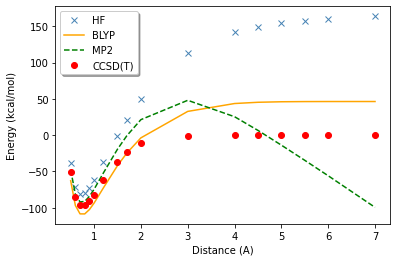

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# convert dictionary pef to lists
x = list(hf_pef.keys())
hf_y = list(hf_pef.values())
blyp_y = list(blyp_pef.values())
mp2_y = list(mp2_pef.values())
ccsdt_y = list(ccsdt_pef.values())

# convert list to numpy array
x_array=np.array(Rvals)
hf_y_array=np.array(hf_y)
blyp_y_array=np.array(blyp_y)
mp2_y_array=np.array(mp2_y)
ccsdt_y_array=np.array(ccsdt_y)

plt.xlabel('Distance (A)')
plt.ylabel('Energy (kcal/mol)')

plt.plot(x,hf_y,'x',color="SteelBlue",label='HF')
plt.plot(x,blyp_y,'-',color="Orange",label='BLYP')
plt.plot(x,mp2_y,'--',color="Green",label='MP2')
plt.plot(x,ccsdt_y,'o',color="Red",label='CCSD(T)')

plt.legend(loc='upper left',shadow=True)
plt.show()


In [ ]:
# now try the case of HF molecule

### Conclusion

And briefly comment your findings ... what is the performance of different method ?

